# Lab Assignment 07
The objective of this lab assignment is to cluster customers of a telephone company (`data_lab_07.csv`), using different clustering techniques and evaluate the clusters found

#### Instructions:
Complete each task and question by filling in the blanks (`...`) with one or more lines of code or text. Tasks 1-11 and questions 1-5 are worth **0.5 points** each and questions 6-7 are worth **1 point** each (out of **10 points**).

#### Submission:
This assignment is due **Monday, November 18, at 11:59PM (Central Time)**.

This assignment must be submitted on Gradescope as a **PDF file** containing the completed code for each task and the corresponding output. Late submissions will be accepted within **0-12**  hours after the deadline with a **0.5-point (5%) penalty** and within **12-24** hours after the deadline with a **2-point (20%) penalty**. No late submissions will be accepted more than 24 hours after the deadline.

**This assignment is individual**. Offering or receiving any kind of unauthorized or unacknowledged assistance is a violation of the University’s academic integrity policies, will result in a grade of zero for the assignment, and will be subject to disciplinary action.

### Part 1: Hierarchical Clustering

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [2]:
# Load dataset and display the first five rows
data = pd.read_csv('data_lab_07.csv')
data.head()

,Account length,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Task 01 (of 11): Create a new numerical attribute named 'Total charge' that contains the sum of the attributes 'Total day charge', 'Total eve charge', and 'Total night charge'.**

In [3]:
data['Total charge'] = data['Total day charge'] + data[ 'Total eve charge'] + data['Total night charge']

In [4]:
# Partition the dataset into attributes and true clusters (churned/non-churned)
# Consider only the following attributes: 'International plan', 'Total charge', and 'Customer service calls'
X = data[['International plan', 'Total charge', 'Customer service calls']]
Y = data['Churn']

**Task 02 (of 11): Standardize the attributes.**

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

**Task 03 (of 11): Cluster the dataset using hierarchical clustering with single linkage method.**
_Hint:_ Use single linkage as the method and Euclidean distance as the distance metric.

In [6]:
clustering = linkage(X_scaled, method = "single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
print(clusters)

[1 1 1 ... 1 2 1]


**Task 04 (of 11): Plot contingency matrix and compute evaluation metrics for hierarchical clustering with single linkage method.**

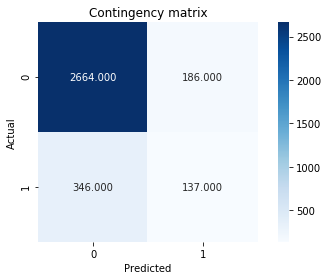

In [7]:
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [8]:
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.201747491556069, 0.5588810706001527]


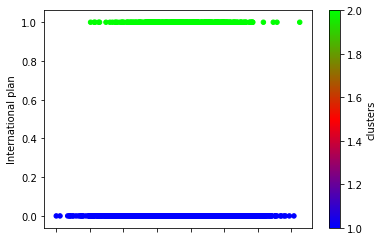

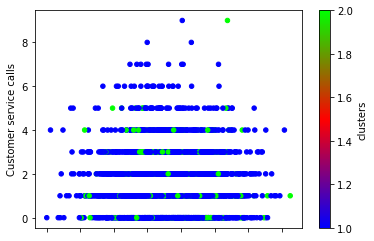

In [9]:
# Plot clusters found using hierarchical clustering with single linkage method
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)

**Question 01 (of 07): What can you conclude about the clusters found using hierarchical clustering with single linkage method from the plot and the evaluation metrics?**

**Answer:** From the adjusted rand index value (0.202), we can conclude that the single linkage method performance is not good  in terms of "True" clusters as it's not clustering the observations perfectly. ANd from the silhuotte coefficient (0.556), we can conclude that the clusters produced are of average quality in terms of cohesion and seperation.

Coming to the plots, in the first plot, between international plan and clusters, the observations are clustered perfectly with respect to international plan.
But in the second plot, between Customer service calls and the clusters, there is no perfect division of clusters.

**Task 05 (of 11): Cluster the dataset using hierarchical clustering with complete linkage method.**
_Hint:_ Use complete linkage as the method and Euclidean distance as the distance metric.

In [12]:
clustering = linkage(X_scaled, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

**Task 06 (of 11): Plot contingency matrix and compute evaluation metrics for hierarchical clustering with complete linkage method.**

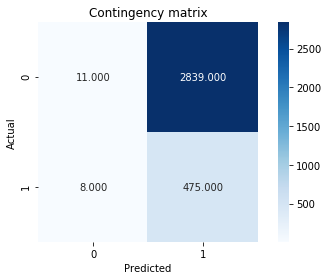

In [13]:
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [14]:
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.017507021065270037, 0.5130278392459514]


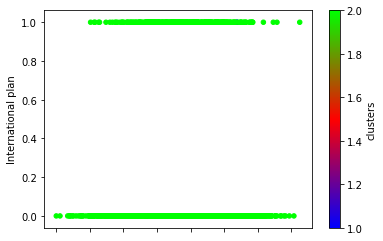

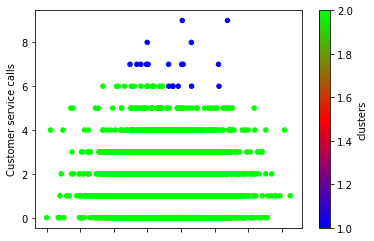

In [13]:
# Plot clusters found using hierarchical clustering with complete linkage method
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)

**Question 02 (of 07): What can you conclude about the clusters found using hierarchical clustering with complete linkage method from the plot and the evaluation metrics?**

**Answer:** From the adjusted rand index value (0.017), we can conclude that the complete linkage method performance is bad in terms of "True" clusters as it's clustering the observations badly. ANd from the silhuotte coefficient (0.556), we can conclude that the clusters produced are of average quality in terms of cohesion and seperation.

Coming to the plots, in the first plot, between international plan and clusters, and in the second plot, between Customer service calls and the clusters, there is no perfect division of clusters.

### Part 2: K-Means Clustering

**Task 07 (of 11): Cluster the dataset using K-Means clustering.**
_Hint:_ Use random initialization of centroids, 10 iterations, and set parameter `random_state` to 0.

In [15]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10).fit(X_scaled)
clusters = clustering.labels_

**Task 08 (of 11): Plot contingency matrix and compute evaluation metrics for K-Means clustering.**

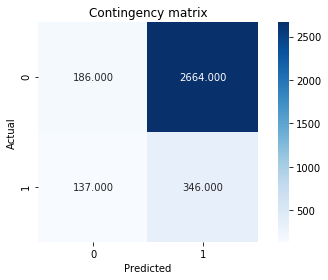

In [16]:
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [17]:
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.201747491556069, 0.5588810706001527]


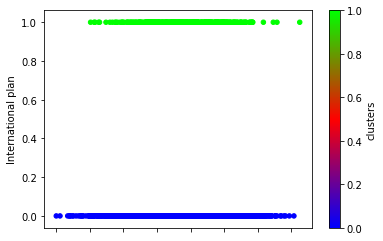

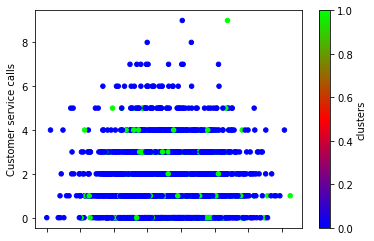

In [24]:
# Plot clusters found using K-Means clustering
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

**Question 03 (of 07): What can you conclude about the clusters found using K-Means clustering from the plot and the evaluation metrics?**

**Answer:** From the adjusted rand index value (0.202), we can conclude that the K-Means performance is not good (similar to single linkage method) in terms of "True" clusters as it's not clustering the observations perfectly. ANd from the silhuotte coefficient (0.556), we can conclude that the clusters produced are of average quality in terms of cohesion and seperation.

Coming to the plots, in the first plot, between international plan and clusters, the observations are clustered perfectly with respect to international plan.
But in the second plot, between Customer service calls and the clusters, there is no perfect division of clusters.

### Part 3: DBSCAN

**Task 09 (of 11): Cluster the dataset using DBSCAN.**
_Hint:_ Use parameters `Eps=2`, `MinPts=5`, and Euclidean distance as the distance metric.

In [18]:
clustering = DBSCAN(eps = 2, min_samples = 5, metric = "euclidean").fit(X_scaled)
clusters = clustering.labels_

**Task 10 (of 11): Plot contingency matrix and compute evaluation metrics for DBSCAN.**

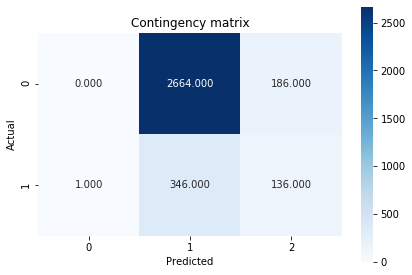

In [19]:
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [20]:
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.20184369179051267, 0.556193882912843]


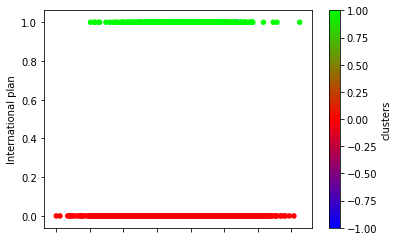

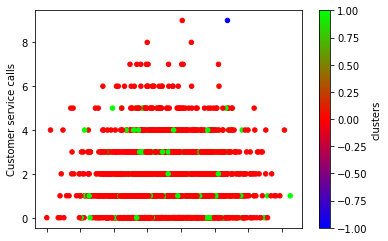

In [21]:
# Plot clusters found using DBSCAN
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

**Question 04 (of 07): How many clusters were found using DBSCAN?**

**Answer:** three

**Question 05 (of 07): What can you conclude about the clusters found using DBSCAN from the plot and the evaluation metrics?**

**Answer:** From the Evaluation metrics, even though the adjusted rand index and silhuotte coefficient values are not that low, DBSCAN clustered the observations into three clusters instead of 2. So, we can conclude that it's performance is very bad.

Coming to the plots, in the first plot, between international plan and clusters, the observations are clustered perfectly with respect to international plan.
But in the second plot, between Customer service calls and the clusters, there is no perfect division of clusters.

**Question 06 (of 07): Which of the clustering techniques had the best performance?**

**Answer:** Based on the adjusted rand index and silhuottee coefficient values, and the number of clusters each clustering technique had divided the observations, the K-Means clustering and single linkage method had the best perfomance.

**Task 11 (of 11): Compute evaluation metrics for the true clusters of the data (churned/non-churned).**

In [25]:
# adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], data['Churn'])
silhouette_coefficient = metrics.silhouette_score(X_scaled, data['Churn'], metric = "euclidean")
# print([adjusted_rand_index, silhouette_coefficient])
print(silhouette_coefficient)

0.29452252272489277


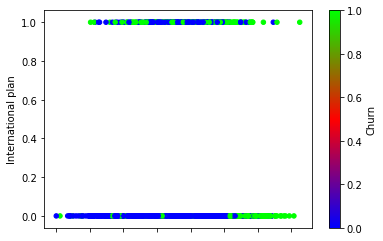

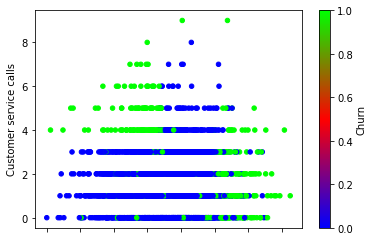

In [29]:
# Plot true clusters (churned/non-churned)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'Churn', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'Churn', colormap = plt.cm.brg)

**Question 07 (of 07): What can you conclude about the data from the plot and the evaluation metrics?**

**Answer:** From the silhouette coefficient (0.294), we can conclude that the original clusters has average cluster quality in terms of cohesion and seperation. 

Coming to the plots, in the first plot, between international plan and original clusters, and in the second plot, between Customer service calls and the original clusters, there is no perfect division of clusters.